In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
import glob
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split      # dividing the dataset
from sklearn.preprocessing import LabelEncoder            # for converting str labels to number
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from PIL import Image
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sn
import random


os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # 0 = all messages, 1 = filter INFO, 2 = filter WARNING, 3 = filter ERROR
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint ,Callback # type: ignore
from tensorflow.keras import layers, models ,optimizers # type: ignore
from tensorflow.keras.models import load_model # type: ignore
from tensorflow.keras.layers import GlobalAveragePooling2D # type: ignore
from tensorflow.keras.applications import EfficientNetB0 # type: ignore
import pathlib

import warnings
warnings.filterwarnings("ignore")

In [3]:
tf.version.VERSION

'2.17.0'

In [4]:
import os
from PIL import Image
from collections import defaultdict

# Basic review of the photos directory
def dataset_analysis(path):
    subfolders = os.listdir(path)

    for subfolder in subfolders:
        subfolder_path = os.path.join(path, subfolder)
        if os.path.isdir(subfolder_path):
            files = os.listdir(subfolder_path)
            format_dimensions_counts = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))

            for file in files:
                try:
                    file_path = os.path.join(subfolder_path, file)
                    with Image.open(file_path) as img:
                        image_type = img.format.upper()  # Format (e.g., JPEG, PNG)
                        image_dimensions = img.size  # (width, height)
                        image_mode = img.mode  # Mode (e.g., RGB, L)
                        
                        # Calculate bit depth
                        if image_mode == "1":
                            bit_depth = 1
                        elif image_mode == "L":
                            bit_depth = 8
                        elif image_mode == "P":
                            bit_depth = 8
                        elif image_mode == "RGB":
                            bit_depth = 24
                        elif image_mode == "RGBA":
                            bit_depth = 32
                        elif image_mode == "CMYK":
                            bit_depth = 32
                        else:
                            bit_depth = "Unknown"
                        
                        format_dimensions_counts[image_type][(image_dimensions, bit_depth)][image_mode] += 1
                except Exception as e:
                    print(f"Exception processing '{file}' in '{subfolder}': {e}")
                    
            print('--------'*10)
            print(f"Subfolder '{subfolder}' contains ({len(files)} files):")
            for format, dimensions_counts in format_dimensions_counts.items():
                print(f"- {sum(sum(counts.values()) for counts in dimensions_counts.values())} images of format {format}:")
                for (dimensions, bit_depth), counts in dimensions_counts.items():
                    for mode, count in counts.items():
                        print(f"  - {count} images with dimensions {dimensions}, bit depth {bit_depth}, mode {mode}")

# Update the path to your dataset
path = r'C:\Users\shibam\Desktop\dataset'  # Update 'your_username' accordingly
dataset_path = path
dataset_analysis(dataset_path)


--------------------------------------------------------------------------------
Subfolder 'cataract' contains (1038 files):
- 938 images of format JPEG:
  - 298 images with dimensions (512, 512), bit depth 24, mode RGB
  - 640 images with dimensions (256, 256), bit depth 24, mode RGB
- 100 images of format PNG:
  - 76 images with dimensions (2592, 1728), bit depth 24, mode RGB
  - 5 images with dimensions (1848, 1224), bit depth 24, mode RGB
  - 19 images with dimensions (2464, 1632), bit depth 24, mode RGB
--------------------------------------------------------------------------------
Subfolder 'diabetic_retinopathy' contains (1098 files):
- 1098 images of format JPEG:
  - 1098 images with dimensions (512, 512), bit depth 24, mode RGB
--------------------------------------------------------------------------------
Subfolder 'glaucoma' contains (1007 files):
- 906 images of format JPEG:
  - 306 images with dimensions (512, 512), bit depth 24, mode RGB
  - 600 images with dimensions (

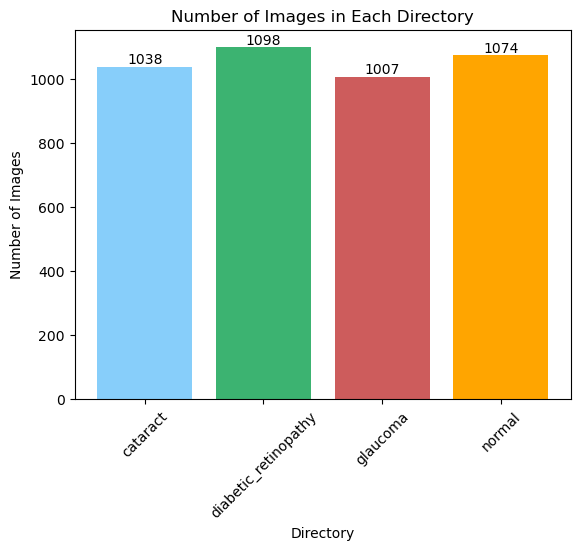

In [5]:
# Count the number of images in each directory
subfolders = os.listdir(path)

image_counts = []
for directory in subfolders:
    sub_dir = os.path.join(path, directory)
    if os.path.isdir(sub_dir):
        file_count = len(os.listdir(sub_dir))
        image_counts.append(file_count)
        
#Add value counts on each bar
for i in range(len(subfolders)):
    plt.text(i, image_counts[i], str(image_counts[i]), ha='center', va='bottom')
    
#Set some colors
colors = ['lightskyblue', 'mediumseagreen', 'indianred', 'orange']

# Plotting the results
plt.bar(subfolders, image_counts, color=colors)
plt.xlabel('Directory')
plt.xticks(rotation = 45)
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Directory')
plt.show()

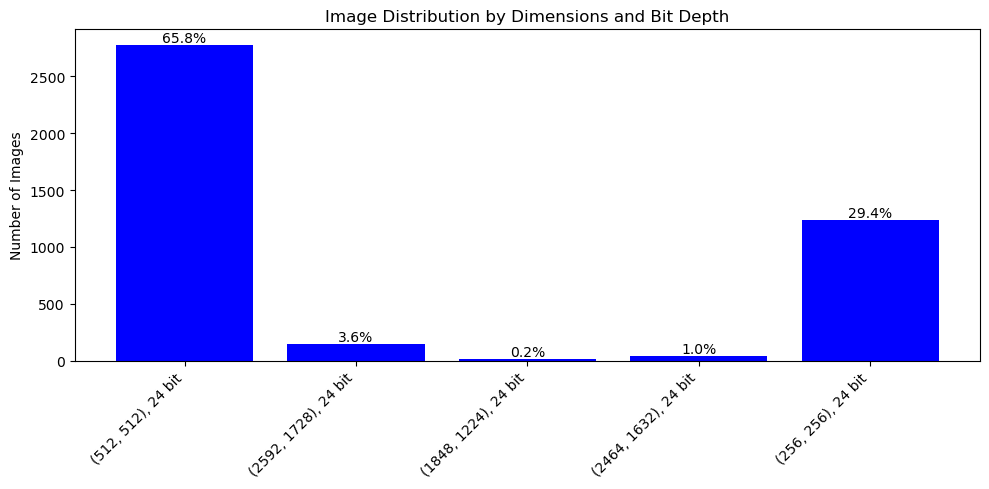

In [6]:
# Check the photos by size

def dataset_size_analysis(path):
    format_dimensions_counts = defaultdict(int)

    subfolders = os.listdir(path)
    for subfolder in subfolders:
        subfolder_path = os.path.join(path, subfolder)
        if os.path.isdir(subfolder_path):
            files = os.listdir(subfolder_path)

            for file in files:
                try:
                    file_path = os.path.join(subfolder_path, file)
                    with Image.open(file_path) as img:
                        image_dimensions = img.size
                        image_mode = img.mode

                        # Calculate bit depth
                        bit_depth = {
                            "1": 1,
                            "L": 8,
                            "P": 8,
                            "RGB": 24,
                            "RGBA": 32,
                            "CMYK": 32
                        }.get(image_mode, "Unknown")

                        # Update counts
                        format_dimensions_counts[(image_dimensions, bit_depth)] += 1

                except Exception as e:
                    print(f"Exception processing '{file}' in '{subfolder}': {e}")

    # Plotting dimensions and bit depths
    plt.figure(figsize=(10, 5))
    labels = [f"{dims}, {depth} bit" for (dims, depth) in format_dimensions_counts]
    sizes = list(format_dimensions_counts.values())
    total = sum(sizes)
    bars = plt.bar(labels, sizes, color='blue')
    plt.xticks(rotation=45, ha="right")
    plt.ylabel('Number of Images')
    plt.title('Image Distribution by Dimensions and Bit Depth')

    # Adding percentage labels above the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{100 * yval/total:.1f}%', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Set the path to the dataset directory
dataset_size_analysis(path)


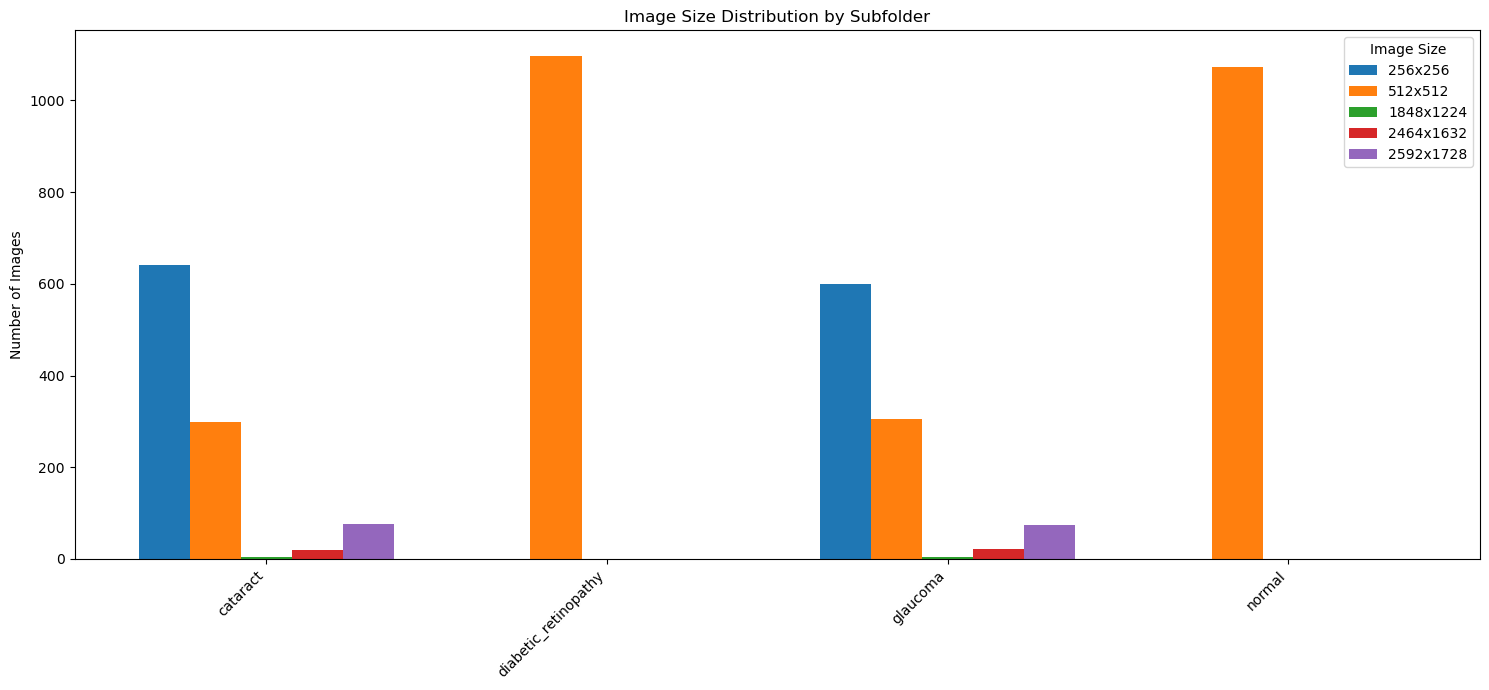

In [7]:
def dataset_size_analysis(path):
    # Dictionary to store counts: {subfolder: {image_size: count}}
    folder_size_counts = defaultdict(lambda: defaultdict(int))

    for subfolder in os.listdir(path):
        subfolder_path = os.path.join(path, subfolder)
        if os.path.isdir(subfolder_path):
            for file in os.listdir(subfolder_path):
                try:
                    file_path = os.path.join(subfolder_path, file)
                    with Image.open(file_path) as img:
                        dims = img.size
                        folder_size_counts[subfolder][dims] += 1
                except Exception as e:
                    print(f"Exception processing '{file}' in '{subfolder}': {e}")

    # Create a single plot
    plt.figure(figsize=(15, 7))
    
    # Determine unique image sizes across all folders for consistent coloring and grouping
    all_sizes = set(size for sizes in folder_size_counts.values() for size in sizes)
    all_sizes = sorted(all_sizes, key=lambda s: (s[0] * s[1]))  # Sort by area

    subfolder_names = list(folder_size_counts.keys())
    bar_width = 0.15  # Width of bars
    indices = range(len(subfolder_names))

    for i, size in enumerate(all_sizes):
        counts = [folder_size_counts[subfolder].get(size, 0) for subfolder in subfolder_names]
        plt.bar([index + i * bar_width for index in indices], counts, bar_width, label=f'{size[0]}x{size[1]}')

    plt.xticks([index + (len(all_sizes) - 1) * bar_width / 2 for index in indices], subfolder_names, rotation=45, ha="right")
    plt.ylabel('Number of Images')
    plt.title('Image Size Distribution by Subfolder')
    plt.legend(title="Image Size")
    plt.tight_layout()
    plt.show()

# Set the path to the dataset directory
dataset_size_analysis(path)

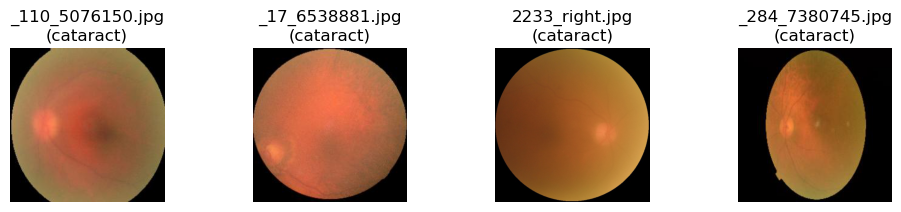

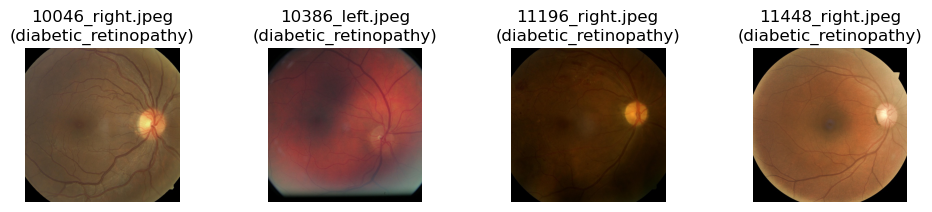

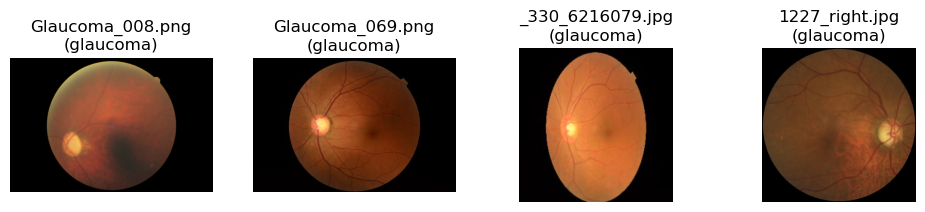

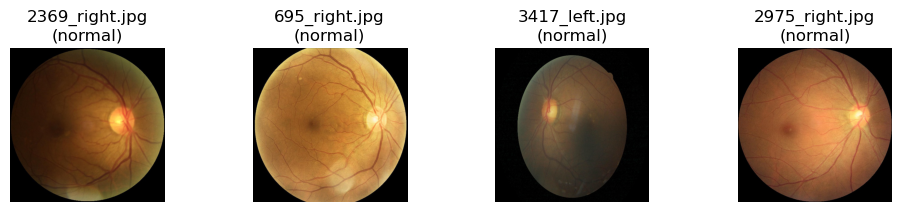

In [8]:
# Preview photos

def random_photos_from_folders(base_folder):
    # Walk through all directories and files in the base_folder
    for root, dirs, files in os.walk(base_folder):
        # Filter to get only files that are images
        images = [file for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg'))]
        
        if len(images) >= 4:  # Ensure there are at least 4 images
            selected_images = random.sample(images, 4)  # Randomly select 4 images
            
            # Display selected images
            fig, axs = plt.subplots(1, 4, figsize=(12, 2))  # Create a 1x4 grid of plots
            for idx, img_name in enumerate(selected_images):
                img_path = os.path.join(root, img_name)
                img = Image.open(img_path)
                axs[idx].imshow(img)
                axs[idx].axis('off')  # Hide axes
                
                # Extract sub-folder name from the root path
                subfolder_name = os.path.basename(root)
                # Set the title to include image name and sub-folder name
                axs[idx].set_title(f"{img_name}\n({subfolder_name})")
                
            plt.show()

# Path to the folder containing sub-folders with images

random_photos_from_folders(path)

In [9]:
# Getting the names of classes
class_dirs = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]

# create data path and their labeles
data = []
labels = []
extensions = ["jpg", "JPG", "jpeg", "JPEG", "png", "PNG", "bmp", "BMP", "gif", "GIF"]

for i in class_dirs:
    class_label = i
    image_files = []
    for ext in extensions:
        # Search for files with each extension and extend the image_files list
        image_files.extend(glob.glob(os.path.join(path, i, f"*.{ext}")))
    data.extend(image_files)
    labels.extend([class_label] * len(image_files))

# Check if lists are still empty
if not data:
    print("No files were found. Check your directory paths and file formats.")
else:
    print("Files found and listed.")


# Create a DataFrame with the image paths and labels
df = pd.DataFrame({
'filename': data,
'class': labels
})


# Shuffle the dataset by rows
df = df.sample(frac=1)

Files found and listed.


In [10]:
display(df)

,filename,class
6176,C:\Users\shibam\Desktop\dataset\glaucoma\Glauc...,glaucoma
4825,C:\Users\shibam\Desktop\dataset\glaucoma\_249_...,glaucoma
886,C:\Users\shibam\Desktop\dataset\cataract\_6_48...,cataract
5276,C:\Users\shibam\Desktop\dataset\glaucoma\1282_...,glaucoma
738,C:\Users\shibam\Desktop\dataset\cataract\_349_...,cataract
...,...,...
5818,C:\Users\shibam\Desktop\dataset\glaucoma\_2_88...,glaucoma
5473,C:\Users\shibam\Desktop\dataset\glaucoma\365_l...,glaucoma
2404,C:\Users\shibam\Desktop\dataset\diabetic_retin...,diabetic_retinopathy
6253,C:\Users\shibam\Desktop\dataset\glaucoma\Glauc...,glaucoma


In [11]:
# Convert labels to one-hot encodings
label_encoder = LabelEncoder()
label = label_encoder.fit_transform(df['class'])
df['class'] = label

# check number assigned to each class
# Get the class names and corresponding integer encodings
class_names = label_encoder.classes_
class_numbers = label_encoder.transform(label_encoder.classes_)

# Print class names with the assigned numbers
class_dict = dict(zip(class_names, class_numbers))
print(class_dict)

{'cataract': 0, 'diabetic_retinopathy': 1, 'glaucoma': 2, 'normal': 3}


In [12]:
display(df)

,filename,class
6176,C:\Users\shibam\Desktop\dataset\glaucoma\Glauc...,2
4825,C:\Users\shibam\Desktop\dataset\glaucoma\_249_...,2
886,C:\Users\shibam\Desktop\dataset\cataract\_6_48...,0
5276,C:\Users\shibam\Desktop\dataset\glaucoma\1282_...,2
738,C:\Users\shibam\Desktop\dataset\cataract\_349_...,0
...,...,...
5818,C:\Users\shibam\Desktop\dataset\glaucoma\_2_88...,2
5473,C:\Users\shibam\Desktop\dataset\glaucoma\365_l...,2
2404,C:\Users\shibam\Desktop\dataset\diabetic_retin...,1
6253,C:\Users\shibam\Desktop\dataset\glaucoma\Glauc...,2


In [13]:
# Check the balance of the classes
print(df['class'].value_counts(normalize=True))
print('------'*10)

# Split the data into train+validation and test sets
train_plus_val, test = train_test_split(df, test_size=0.2, stratify=df['class'], random_state=42)

# Split the train+validation set into train and validation sets
train, val = train_test_split(train_plus_val, test_size=0.25, stratify=train_plus_val['class'], random_state=42)  # 0.25 x 0.8 = 0.2

# Now you have:
# train: 60% of the data
# val: 20% of the data
# test: 20% of the data

# Confirm the distribution across splits
print("Training set:")
print(train['class'].value_counts(normalize=True))
print('------'*10)


print("Validation set:")
print(val['class'].value_counts(normalize=True))
print('------'*10)


print("Test set:")
print(test['class'].value_counts(normalize=True))

class
1    0.260375
3    0.254683
0    0.246147
2    0.238795
Name: proportion, dtype: float64
------------------------------------------------------------
Training set:
class
1    0.260474
3    0.254545
0    0.246245
2    0.238735
Name: proportion, dtype: float64
------------------------------------------------------------
Validation set:
class
1    0.260225
3    0.254890
0    0.245999
2    0.238886
Name: proportion, dtype: float64
------------------------------------------------------------
Test set:
class
1    0.260225
3    0.254890
0    0.245999
2    0.238886
Name: proportion, dtype: float64


In [14]:
train_links, train_labels = train['filename'].values , train['class'].values
val_links , val_labels = val['filename'].values , val['class'].values
test_links, test_labels = test['filename'].values , test['class'].values

In [15]:

def load_and_preprocess_image(path, label, data_augmentation=True):
    # Read the image file
    image = tf.io.read_file(path)
    
    # Extract file extension
    file_extension = tf.strings.split(path, '.')[-1]
    
    # Decode based on file extension using tf.cond
    def decode_jpeg():
        return tf.image.decode_jpeg(image, channels=3)
    
    def decode_png():
        return tf.image.decode_png(image, channels=3)
    
    def decode_bmp():
        return tf.image.decode_bmp(image, channels=3)
    
    def decode_gif():
        # Decode GIF and take the first frame
        return tf.squeeze(tf.image.decode_gif(image), axis=0)
    
    # Handle each format
    image = tf.cond(tf.math.equal(file_extension, 'jpg'), decode_jpeg,
            lambda: tf.cond(tf.math.equal(file_extension, 'jpeg'), decode_jpeg,
            lambda: tf.cond(tf.math.equal(file_extension, 'png'), decode_png,
            lambda: tf.cond(tf.math.equal(file_extension, 'bmp'), decode_bmp,
            lambda: tf.cond(tf.math.equal(file_extension, 'gif'), decode_gif,
            decode_jpeg)))))
    
    # Resize and normalize
    image = tf.image.resize(image, [256, 256])
    image = image / 255.0  # Normalize to [0, 1] range

    # Apply data augmentation if in training mode
    if data_augmentation == True:
        # Randomly flip the image horizontally
        image = tf.image.random_flip_left_right(image)
        
        # Randomly flip the image vertically
        image = tf.image.random_flip_up_down(image)
        
        # Randomly rotate the image
        image = tf.image.rot90(image, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
        
        # Randomly adjust brightness
        image = tf.image.random_brightness(image, max_delta=0.1)
        
        # Randomly zoom in
        image = tf.image.resize_with_crop_or_pad(image, 266, 266)  # Zoom in slightly
        image = tf.image.random_crop(image, size=[256, 256, 3])
        
        # Randomly adjust contrast
        image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
        
    return image, label

In [16]:
train_dataset = tf.data.Dataset.from_tensor_slices( (train_links , train_labels) )
train_dataset = train_dataset.map(lambda x, y: load_and_preprocess_image(x, y, data_augmentation=True), num_parallel_calls=tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices( (val_links , val_labels) )
val_dataset = val_dataset.map(lambda x, y: load_and_preprocess_image(x, y, data_augmentation=False), num_parallel_calls=tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices( (test_links , test_labels) )
test_dataset = test_dataset.map(lambda x, y: load_and_preprocess_image(x, y, data_augmentation=False), num_parallel_calls=tf.data.AUTOTUNE)

In [17]:
# Iterate over the dataset and print the first few elements
for data_element, label_element in train_dataset.take(1):  # Adjust the number to print more/less
    print(f"Data: {data_element.numpy()}, Label: {label_element.numpy()}")

Data: [[[ 0.01017322 -0.00134774 -0.01278672]
  [ 0.01017322 -0.00134774 -0.01278672]
  [ 0.01017322 -0.00134774 -0.01278672]
  ...
  [ 0.01017322 -0.00134774 -0.01278672]
  [ 0.01017322 -0.00134774 -0.01278672]
  [ 0.02172658  0.01020563 -0.00123336]]

 [[ 0.01017322 -0.00134774 -0.01278672]
  [ 0.01017322 -0.00134774 -0.01278672]
  [ 0.01017322 -0.00134774 -0.01278672]
  ...
  [ 0.01017322 -0.00134774 -0.01278672]
  [ 0.01017322 -0.00134774 -0.01278672]
  [ 0.02172658  0.01020563 -0.00123336]]

 [[ 0.01017322 -0.00134774 -0.01278672]
  [ 0.01017322 -0.00134774 -0.01278672]
  [ 0.01017322 -0.00134774 -0.01278672]
  ...
  [ 0.01017322 -0.00134774 -0.01278672]
  [ 0.01017322 -0.00134774 -0.01278672]
  [ 0.02172658  0.01020563 -0.00123336]]

 ...

 [[ 0.01017322 -0.00134774 -0.01278672]
  [ 0.01017322 -0.00134774 -0.01278672]
  [ 0.01017322 -0.00134774 -0.01278672]
  ...
  [ 0.01017322 -0.00134774 -0.01278672]
  [ 0.01017322 -0.00134774 -0.01278672]
  [ 0.02172658  0.01020563 -0.00123336

In [18]:
# Iterate over the dataset and print the first few elements
for data_element, label_element in train_dataset.take(1):  # Adjust the number to print more/less
    print(f"Data: {data_element.numpy().shape}, Label: {label_element.numpy()}")

Data: (256, 256, 3), Label: 1


In [19]:

batch_size = 10

train_dataset = train_dataset.batch(batch_size)
train_dataset = train_dataset.prefetch(buffer_size= tf.data.AUTOTUNE)

val_dataset = val_dataset.batch(batch_size)
val_dataset = val_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

test_dataset = test_dataset.batch(batch_size)
test_dataset = test_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
model = models.Sequential([
    # First Block
    layers.Conv2D(128, (3, 3), activation='relu', input_shape=(256, 256, 3), padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    

    # Second Block
    layers.Conv2D(256, (3, 3), activation='relu',padding='valid'),
    layers.Conv2D(256, (3, 3), activation='relu',padding='valid'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    # Second Block
    layers.Conv2D(256, (3, 3), activation='relu',padding='valid'),
    layers.Conv2D(256, (3, 3), activation='relu',padding='valid'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    # Second Block
    layers.Conv2D(256, (3, 3), activation='relu',padding='valid'),
    layers.Conv2D(256, (3, 3), activation='relu',padding='valid'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),



    # Global Average Pooling instead of Flatten
    layers.GlobalAveragePooling2D(),

    # Fully Connected Layers
    layers.Dense(512,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')  # Output layer
])


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 256, 256, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 256)  │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 124, 124, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 62, 62, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 58, 58, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 29, 29, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 29, 29, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 27, 27, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 25, 25, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,533,956 (13.48 MB)

 Trainable params: 3,532,164 (13.47 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [21]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [22]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the EarlyStopping callback to monitor the validation accuracy
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=12,
    verbose=1,
    mode='max',
    restore_best_weights=True
)

# Define the ModelCheckpoint callback
model_checkpoint = ModelCheckpoint(
    filepath=r'/home/mojtaba/eye_diseases_classification project/saved model/best_model_custom.keras',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min'
)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
history = model.fit(
    x=train_dataset,
    validation_data=val_dataset,
    epochs=10,
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.3509 - loss: 1.4343
Epoch 1: val_loss improved from inf to 1.49322, saving model to /home/mojtaba/eye_diseases_classification project/saved model/best_model_custom.keras
506/506 ━━━━━━━━━━━━━━━━━━━━ 3414s 7s/step - accuracy: 0.3510 - loss: 1.4341 - val_accuracy: 0.3420 - val_loss: 1.4932
Epoch 2/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.4694 - loss: 1.1628 
Epoch 2: val_loss improved from 1.49322 to 1.13204, saving model to /home/mojtaba/eye_diseases_classification project/saved model/best_model_custom.keras
506/506 ━━━━━━━━━━━━━━━━━━━━ 5405s 11s/step - accuracy: 0.4694 - loss: 1.1628 - val_accuracy: 0.4902 - val_loss: 1.1320
Epoch 3/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4902 - loss: 1.1134
Epoch 3: val_loss did not improve from 1.13204
506/506 ━━━━━━━━━━━━━━━━━━━━ 2674s 5s/step - accuracy: 0.4903 - loss: 1.1134 - val_accuracy: 0.4641 - val_loss: 1.1791
Epoch 4/10
506/506 ━━━━━━━━━━━━━━━

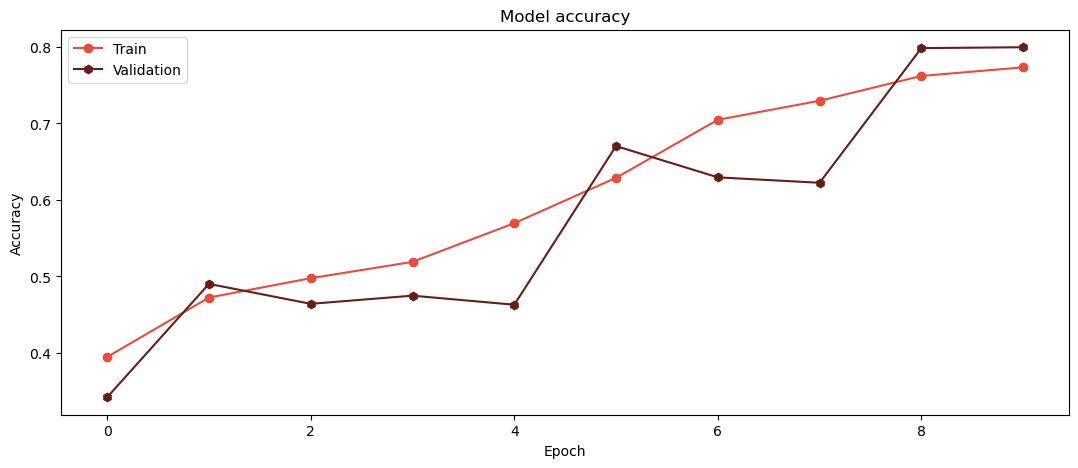

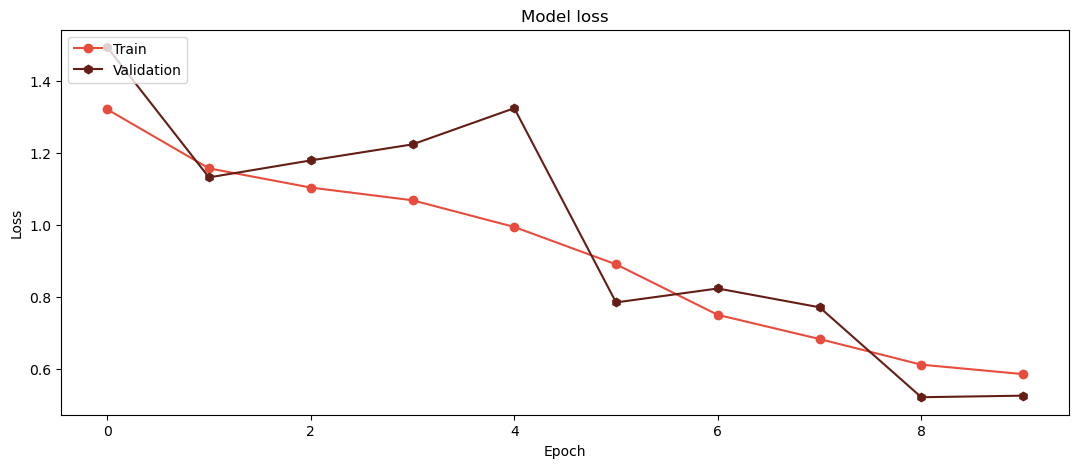

In [24]:
# Plot training & validation accuracy values
plt.figure(figsize=(13,5))
plt.plot(history.history['accuracy'],color="#E74C3C", marker='o')
plt.plot(history.history['val_accuracy'], color='#641E16', marker='h')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(13,5))
plt.plot(history.history['loss'],color="#E74C3C", marker='o')
plt.plot(history.history['val_loss'], color='#641E16', marker='h')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend( ['Train', 'Validation'], loc='upper left')
plt.show()

In [25]:
# Load the saved model
# If the best model is captured by the early stopping mechanism then best_model = model
# best_model = model

best_model = load_model(r'/home/mojtaba/eye_diseases_classification project/saved model/best_model_custom.keras')



# Evaluate the model
train_loss, train_accuracy = best_model.evaluate(train_dataset)
val_loss, val_accuracy = best_model.evaluate(val_dataset)
test_loss, test_accuracy = best_model.evaluate(test_dataset)

print(f"train loss: {train_loss}")
print(f"train accuracy: {train_accuracy}")
print('----'*6)
print(f"val loss: {val_loss}")
print(f"val accuracy: {val_accuracy}")
print('----'*6)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

506/506 ━━━━━━━━━━━━━━━━━━━━ 500s 987ms/step - accuracy: 0.7695 - loss: 0.6154
169/169 ━━━━━━━━━━━━━━━━━━━━ 168s 994ms/step - accuracy: 0.7968 - loss: 0.5205
169/169 ━━━━━━━━━━━━━━━━━━━━ 167s 990ms/step - accuracy: 0.7881 - loss: 0.5360
train loss: 0.617824912071228
train accuracy: 0.7628458738327026
------------------------
val loss: 0.5221237540245056
val accuracy: 0.7984588146209717
------------------------
Test loss: 0.5327134132385254
Test accuracy: 0.7895672917366028


In [26]:
# Assuming best_model is your trained Keras model

# Get the predicted labels from the model
y_pred = np.argmax( best_model.predict(test_dataset) , axis=1 ) # Convert probabilities to class indices
y_true = test_labels

# Compute confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(conf_mat)

# Get the class labels from the LabelEncoder
class_labels = label_encoder.classes_

# Compute classification report
report = classification_report(y_true, y_pred, target_names=class_labels)

print("\nClassification Report:")
print(report)

169/169 ━━━━━━━━━━━━━━━━━━━━ 157s 930ms/step
Confusion Matrix:
[[390   0   9  16]
 [  2 386  14  37]
 [ 84  11 238  70]
 [ 45   9  58 318]]

Classification Report:
                      precision    recall  f1-score   support

            cataract       0.75      0.94      0.83       415
diabetic_retinopathy       0.95      0.88      0.91       439
            glaucoma       0.75      0.59      0.66       403
              normal       0.72      0.74      0.73       430

            accuracy                           0.79      1687
           macro avg       0.79      0.79      0.78      1687
        weighted avg       0.79      0.79      0.79      1687



Total Number Of Test data:  1687


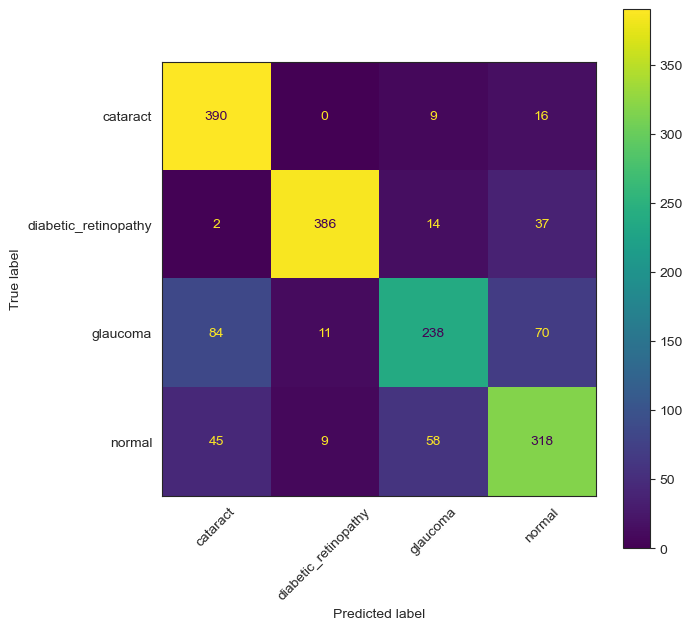

In [27]:
#Confusion matrix
print('Total Number Of Test data: ', len(test_labels))

sn.set_style("white")
def plot_confusion_matrix(conf_mat, classes):
    """
    This function prints and plots the confusion matrix.
    """
    fig, ax = plt.subplots(figsize=(7,7)) # change the plot size
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=classes)
    disp = disp.plot(include_values=True,cmap='viridis', ax=ax, xticks_rotation=45)
    plt.show()

# Get your confusion matrix
conf_mat = conf_mat

# Using label_encoder.classes_ guarantees that class_names matches 
# the order that was used during the one-hot encoding process
class_names = label_encoder.classes_

# Now plot using the function
plot_confusion_matrix(conf_mat, class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 925ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 798ms/step


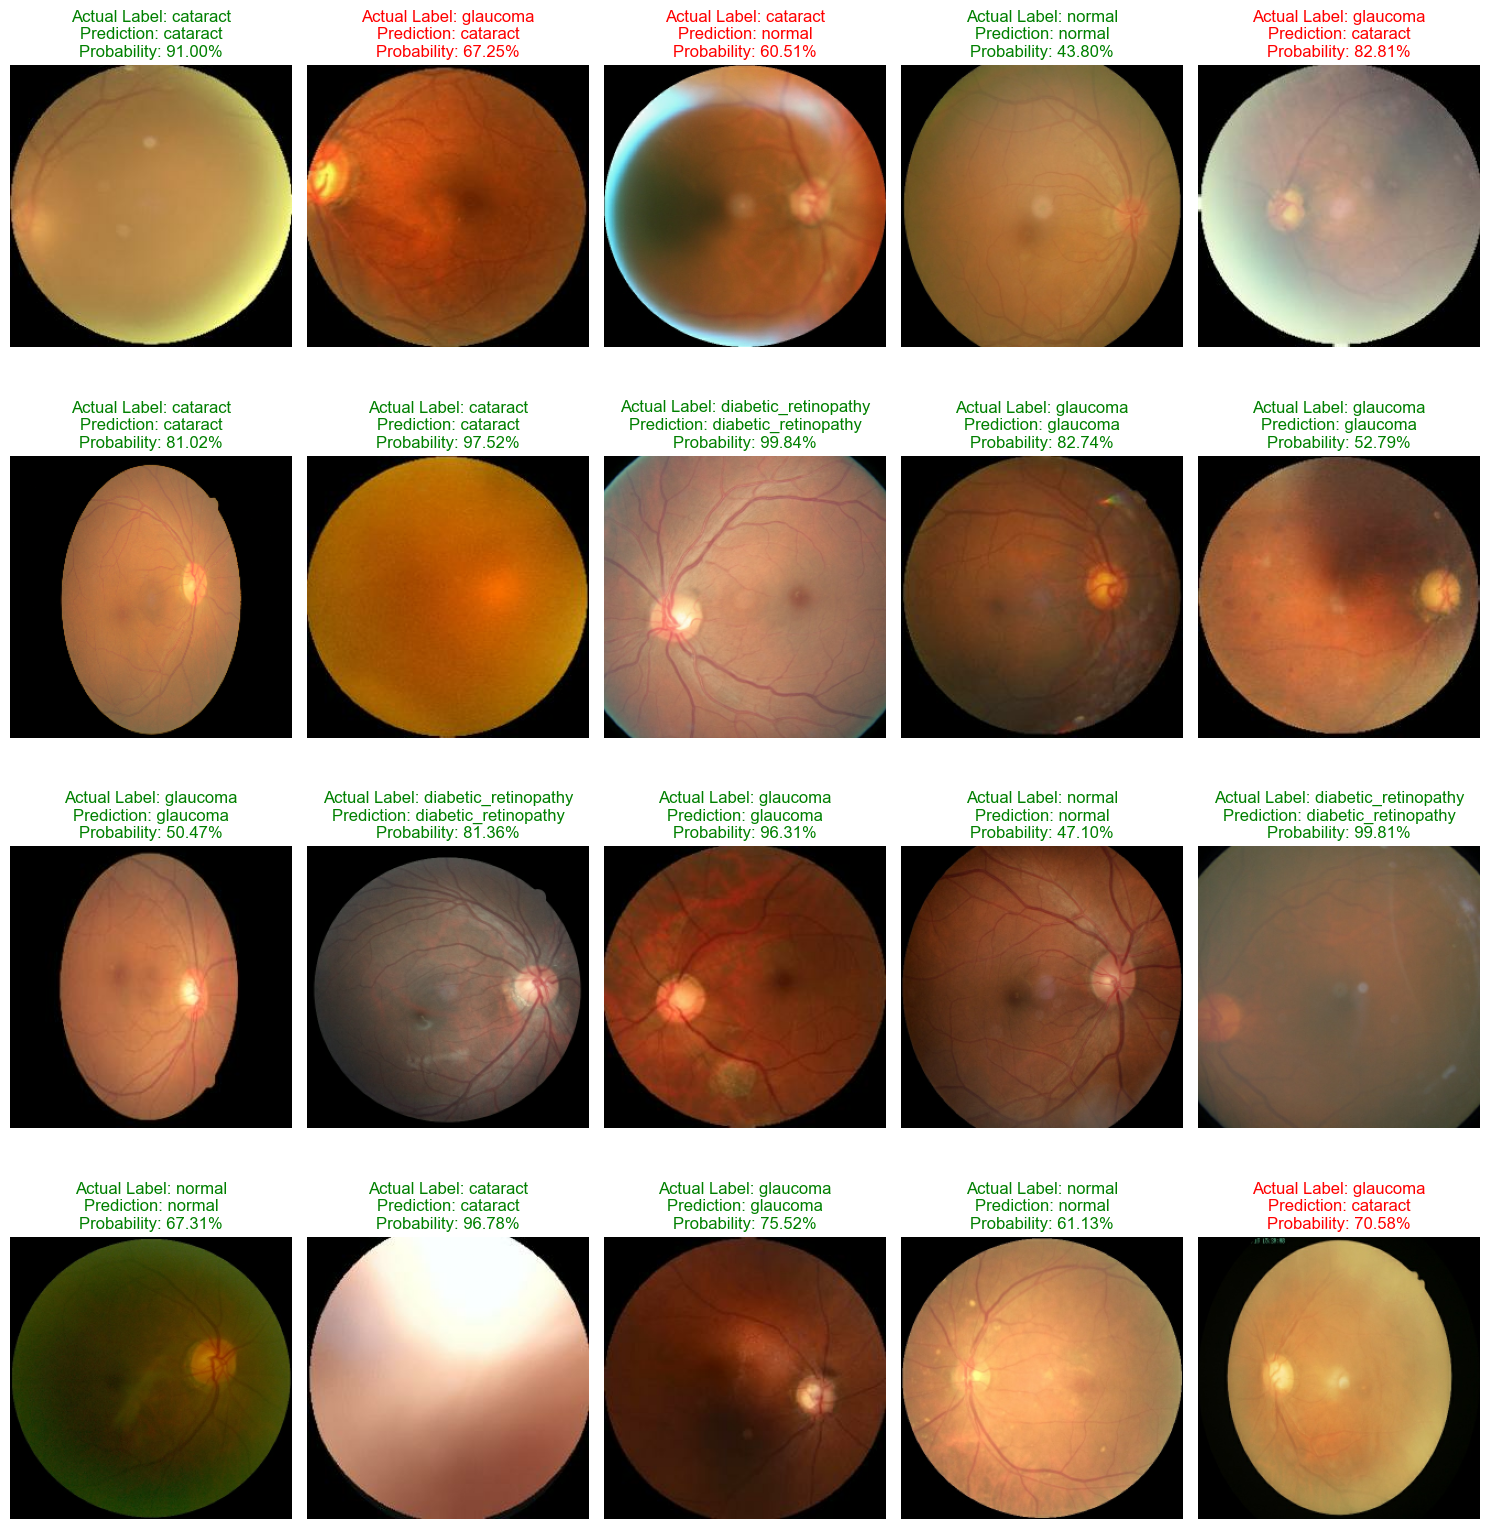

In [28]:
# probability explanation in below function: 
# For example, if the model predicts an image as class B with a probability of 0.7 (or 70%), 
# the plot will show "Probability: 70%". 
# This means the model is 70% confident that the image belongs to class B.


def plot_test_predictions(model, test_dataset, class_labels, num_images=20):
    """
    Plots the predictions of a model on the test dataset.

    Parameters:
    - model: Trained Keras model to be used for prediction.
    - test_dataset: TensorFlow dataset containing the test images and labels.
    - class_labels: List of class labels.
    - num_images: Number of test images to plot (default is 20).
    """

    # Initialize lists to accumulate images and labels
    images = []
    true_labels = []
    pred_labels = []
    pred_probs = []

    for batch_images, batch_labels in test_dataset:
        # Predict on the batch
        batch_pred_probs = model.predict(batch_images)
        batch_pred_labels = np.argmax(batch_pred_probs, axis=1)

        # Accumulate images and labels
        images.extend(batch_images)
        true_labels.extend(batch_labels)
        pred_labels.extend(batch_pred_labels)
        pred_probs.extend(np.max(batch_pred_probs, axis=1) * 100)

        if len(images) >= num_images:
            break

    # Plot the images with predictions
    plt.figure(figsize=(15, 20))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i])
        actual_label = class_labels[true_labels[i]]
        predicted_label = class_labels[pred_labels[i]]
        probability = pred_probs[i]  # Probability of the predicted class

        color = 'green' if actual_label == predicted_label else 'red'
        plt.title(f"Actual Label: {actual_label}\nPrediction: {predicted_label}\nProbability: {probability:.2f}%",
                  color=color, fontsize=12)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Use the function
plot_test_predictions(best_model, test_dataset, class_labels=class_names, num_images=20)